In [10]:
import pandas as pd
import numpy as np

import math

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

crab = pd.read_csv("../../data/crab.csv")
salary = pd.read_csv('../../data/salary.csv')
wells = pd.read_csv("../../data/wells.csv")

## Visualize the response
### In the video you learned the main characteristics of the Poisson random variable and how its distribution changes as the parameter 
 changes. In this exercise, you will examine the response variable visually to assess the parameter value, spread of the distribution or its skewness.

### You will use the crab dataset which you used in previous chapter exercises, but now you will analyze the number of satellite crabs sat, instead of whether there is at least one, near the nesting place.

### The crab dataset has been preloaded in the workspace.

### Instructions
-    Import seaborn library as sns.
-    Import matplotlib library as plt
-    Using the distplot() function plot satvariable.
-    Display the plot using show() function.

/tmp/ipykernel_122209/1393134521.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crab['sat'])


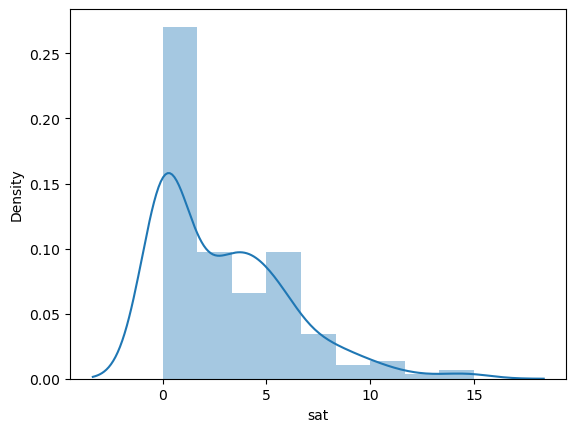

In [11]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sat variable
sns.distplot(crab['sat'])

# Display the plot
plt.show()

## Fitting a Poisson regression
### Continuing with the crab dataset you will fit your first Poisson regression model in this exercise.

### The crab dataset has been preloaded in the workspace.

### Instructions
-    Import statsmodels.api library as sm.
-    Import glm from statsmodels.formula.api.
-    Using Poisson() for the response distribution fit the Poisson regression with satas the response and weight for the explanatory variable.
-    Display the model results using .summary().

In [12]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by weight
model = glm('sat ~ weight', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Fri, 15 Mar 2024   Deviance:                       560.87
Time:                        03:28:49   Pearson chi2:                     536.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

## Estimate parameter lambda
### In the video you learned how the log link function provides for the linear combination in the parameters defining the Poisson regression model of the form

### To obtain the response function in terms of lambda we exponentiated the model function to obtain [equation skipped] In this exercise, you will use this formulation with the horseshoe crab data to compute the estimate of the mean [equation skipped] for the female crab width.

### Dataset crab is preloaded in the workspace.

### Instructions 1/2
-    Import statsmodels.api library as sm and glm from statsmodels.formula.api.
-    Fit and print a Poisson regression model with sat as the response and width as explanatory variable.

In [13]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('sat ~ width', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 15 Mar 2024   Deviance:                       567.88
Time:                        03:28:49   Pearson chi2:                     544.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3129
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

-    Using numpy mean() to compute average of width and save as mean_width.
-    Extract coefficients from model and using the response function compute lambda.

In [14]:
# Compute average crab width
mean_width = np.mean(crab['width'])

# Print the compute mean
print('Average width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda, 3))

Average width:  26.299
Estimated mean of y at average width:  2.744


## Interpret Poisson coefficients
### Using the fitted model from the previous exercise, model, you will further analyze the results by interpreting coefficients and the multiplicative effect on the mean of the response.

### Recall that the multiplicative effect is computed with exp(B1).

### Instructions 2/2
-    Extract model coefficients from model and save them as intercept and slope.
-    Compute the multiplicative effect on the fitted value for each 1-unit increase in width.

In [15]:
# Extract coefficients
intercept, slope = model.params

# Compute and print the multiplicative effect
print(np.exp(slope))

1.17826743864523


## Poisson confidence intervals
### Using the previously fitted horseshoes crab model "sat ~ width" analyze uncertainty of the coefficient estimates by computing the confidence intervals for B1  and the confidence intervals for the multiplicative effect on the mean.

### The model object and crab dataset are preloaded in the workspace.

### Instructions
-    Using the .conf_int() function extract the confidence intervals and save as model_ci.
-    Compute confidence intervals for the multiplicative effect on the mean.

In [16]:
# Compute confidence intervals for the coefficients
model_ci = model.conf_int()

# Compute and print the confidence intervals for the multiplicative effect on the mean
print(np.exp(model_ci))

                  0         1
Intercept  0.012683  0.106248
width      1.133051  1.225289


## Is the mean equal to the variance?
### Under the Poisson model one of the assumptions was that the mean should be the same as the variance. As you learned in the lecture, if this assumption is violated then there is overdispersion. Without adjusting for overdispersion you would wrongly interpret standard errors of the given model.

### In this exercise you will first compute the mean and the variance of the number of satellites for the female crabs.

### The crab dataset is loaded in your workspace.

### Instructions
-    Use numpy mean() to compute and print sample mean for number of satellites variable sat as sat_mean.
-    Use numpy var() to compute and print sample variance for number of satellites variable sat as sat_var.
-    Compute and print ratio of sat_var to sat_mean.

In [17]:
# Compute and print sample mean of the number of satellites: sat_mean
sat_mean = np.mean(crab.sat)

print('Sample mean:', round(sat_mean, 3))

# Compute and print sample variance of the number of satellites: sat_var
sat_var = np.var(crab.sat)
print('Sample variance:', round(sat_var, 3))

# Compute ratio of variance to mean
print('Ratio:', round(sat_var/sat_mean, 3))

Sample mean: 2.919
Sample variance: 9.855
Ratio: 3.376


## Computing expected number of counts
### In the previous exercises you have computed the mean and variance of the crab data and you determined they are not equal. In this exercise you will practice another analysis for overdispersion by using the already computed mean and calculating the expected number of counts per certain value of counts, for example zero counts. In other words, what count of zero satellites should we expect in the sample given the computed sample mean.

### Recall figure from the crab dataset where you can notice a large number of zero counts. [graph skipped]

### Recall that to compute the expected number of counts given the parameter you can use the defined Poisson distribution, given by "P(y) = (lambda^y * e^(-lambda)) / y!

### The crab dataset and the computed mean sat_mean is preloaded in the workspace.

### Instructions
-    Using computed mean sat_mean and the zero counts "y = 0" compute the expected number of zero counts. Use math factorial().
-    Compute the number of observations with zero counts in the sat variable using the sum() and the total number of observations in the sample using the len() functions.
-    Print the ratio of actual zero count observations and total number of observations.

In [18]:
# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(sat_mean,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_cnt = sum(crab['y']  == 0)

# Number of observations in crab dataset
num_obs = len(crab)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_cnt / num_obs,3)*100)

Expected zero counts given mean of  2.919 is  5.4
Actual zero counts in the sample:  35.8


## Checking for overdispersion
### In this exercise you will check for overdispersion in the model you fitted previously, namely the horseshoe crab Poisson model where you fitted sat given width. Recall from the video that to check for potential overdispersion in the fit you would compute the following <code>model.pearson_chi2 / model.df_resid</code> where .pearson_chi2 represents Pearson statistic and .df_resid represents the degrees of freedom of the residuals.

### The model crab_pois and crab dataset are preloaded in the workspace.

### Instructions
-    Compute the ratio of the Pearson statistic and the degrees of freedom of the residuals for the crab_pois Poisson regression model.

In [20]:
crab_pois = glm('sat ~ width', data = crab, family = sm.families.Poisson()).fit()

In [21]:
# Compute and print the overdispersion approximation
print(crab_pois.pearson_chi2 / crab_pois.df_resid)

3.182204743877352


## Fitting negative binomial
### The negative binomial allows for the variance to exceed the mean, which is what you have measured in the previous exercise in your data crab. In this exercise you will recall the previous fit of the Poisson regression using the log link function and additionally fit negative binomial model also using the log link function.

### You will analyze and see how the statistical measures were changed.

### The model crab_pois and crab is loaded in your workspace.

### Instructions
-    Define a formula for the regression model so that sat is predicted by width.
-    Fit the negative binomial using NegativeBinomial() and save the model as crab_NB.
-    Print the summaries of the Poisson model crab_pois and the newly fitted negative binomial model.

In [23]:
import statsmodels.formula.api as smf

In [24]:
# Define the formula for the model fit
formula = 'sat ~ width'

# Fit the GLM negative binomial model using log link function
crab_NB = smf.glm(formula = formula, data = crab, 
				  family = sm.families.NegativeBinomial()).fit()

# Print Poisson model's summary
print(crab_pois.summary())

# Print the negative binomial model's summary
print(crab_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 15 Mar 2024   Deviance:                       567.88
Time:                        03:33:52   Pearson chi2:                     544.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3129
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


## Confidence intervals for negative Binomial model
### Continuing with the previously fitted crab model you will compare the confidence intervals for the negative Binomial model with the Poisson regression model.

### The Poisson regression model crab_pois and the negative Binomial model crab_NB, and crab dataset are preloaded in the workspace.

### Instructions
-    Compute and print confidence intervals for the crab_pois model.
-    Compute and print confidence intervals for the crab_NB model.

In [25]:
# Compute confidence intervals for crab_Pois model
print('Confidence intervals for the Poisson model')
print(crab_pois.conf_int())

# Compute confidence intervals for crab_NB model
print('Confidence intervals for the Negative Binomial model')
print(crab_NB.conf_int())

Confidence intervals for the Poisson model
                  0         1
Intercept -4.367531 -2.241983
width      0.124914  0.203176
Confidence intervals for the Negative Binomial model
                  0         1
Intercept -6.244509 -1.820000
width      0.108155  0.274472


## Plotting data and linear model fit
### In the previous exercises you have practiced how to fit and interpret the Poisson regression model. In this exercise you will visually analyze the crab data and then the model fit.

### First, you will plot a linear fit to the data, which later on you will use to compare to Poisson regression fitted values.

### Instructions
-    Import seaborn and matplotlib libraries.
-    Using crab dataset plot the data points with width on the x-axis and sat on the y-axis, with jitter of 0.3 for the sat variable.
-    Add a linear model fit by setting the argument fit_reg to True.
-    Set 'color' of the line fit as 'green' and the 'label' as 'LM fit'.

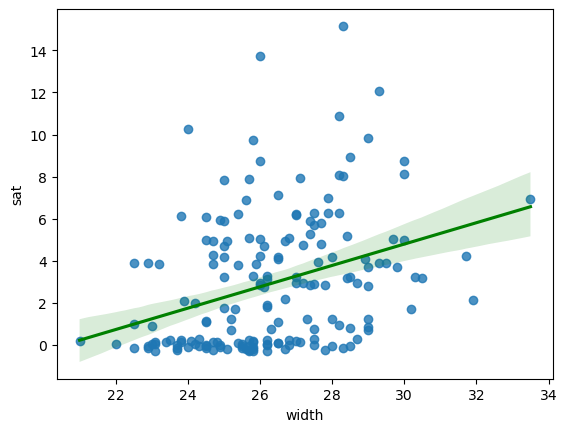

In [33]:
# Import libraries
#import seaborn as sns
#import matplotlib.pyplot as plt
#
# Plot the data points and linear model fit
#sns.regplot('width', 'sat', data = crab,
#            y_jitter = 0.3,
#            fit_reg = True,
#            line_kws = {'color':'green', 
#                        'label':'LM fit'})
#
# Print plot
#plt.show()

## CORRECTED
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data points and linear model fit
sns.regplot(x='width', y='sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True,
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Print plot
plt.show()

## Plotting fitted values
### Using the previously fitted Poisson regression model of horseshoe crab data with sat as the response and width as the explanatory variable you will visually assess the model fit and compare to the previously visualized linear model.

### The crab data and Poisson regression model saved as model are loaded in the workspace.

### Instructions 1/2
-    Extract the fitted values and add them to the crab dataframe as a new fit_values column.

In [35]:
# Add fitted values to the fit_values column of crab dataframe
crab['fit_values'] = model.fittedvalues

-    Using scatterplot() plot the fitted values of the Poisson regression model with width for x-axis and fitted values fit_values for y-axis.
-    For 'color' define 'red' and 'label' define as 'Poisson'.
-    Display the plot using show function.

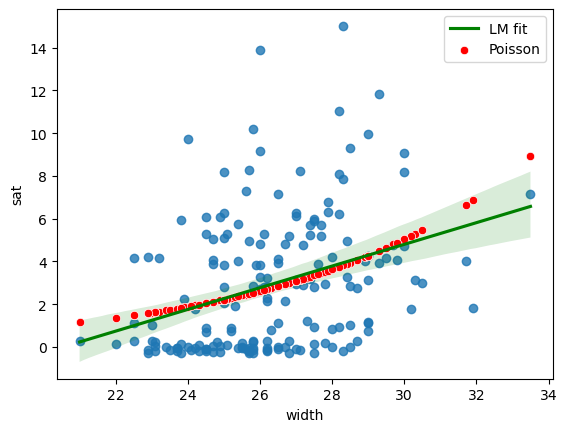

In [38]:
# Plot data points
#sns.regplot('width', 'sat', data = crab,
#            y_jitter = 0.3,
#            fit_reg = True, 
#            line_kws = {'color':'green', 
#                        'label':'LM fit'})
#
# Poisson regression fitted values
#sns.scatterplot('width','fit_values', data = crab,
#           color = 'red', label = 'Poisson')
#
# Print plot          
#plt.show()

# Plot data points
sns.regplot(x='width', y='sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True, 
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Poisson regression fitted values
sns.scatterplot(x='width',y='fit_values', data = crab,
           color = 'red', label = 'Poisson')

# Print plot          
plt.show()